
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>After a thorough check of all the available datasets, I realized that No-show appointments would fit perfectly and go in line with the kind of analysis I tend to do. Patients are often found to miss physician appointments based on several factors which poised lots of unclear reasons to the medical community. This dataset would be a great assistant to diving deeper into some of the root causes and probably finding a lasting solution to such happenings. 


### Question(s) for Analysis
>**The relevant questions I would be asking are :**
1. What Days of the week have the highest numbers of appointments with good Show-up responses?
2. Which neighborhood has the highest number of appointments with physicians?
3. Does the SMS reminder have a positive impact in making sure that patience sees the physicians?

>  I would adopt the Variable Identification, Variable transformation, Variable creation, Missing values treatment and 
Outlier treatment to clean and prepare my data for proper exploration which will help in building a clear-cut analytical report. 


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np                                                   # arrays and linear algebra
import datetime                                                      # This is to help for appropriate date and time
%matplotlib inline

from functools import reduce #merge multiple dataframes together

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for


In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 3.0MB 9.4MB/s eta 0:00:01    25% |████████                        | 757kB 26.7MB/s eta 0:00:01    69% |██████████████████████▎         | 2.1MB 29.5MB/s eta 0:00:01
tensorflow 1.3.0 has requirement tensorflow-tensorboard<0.2.0,>=0.1.0, but you'll have tensorflow-tensorboard 1.5.1 which is incompatible.


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointmentskagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#This is to get my actual working directory for easy acces and path clearity
pwd

'/home/workspace'

In [5]:
# Here, I'm looking for inconsistencies and abnormality in the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The upper results shows that Min AGE is Negetive (-)

In [6]:
#Now let's check the columns for our target variable and predictor
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

With the given result above, we will use No-show as our target variable and all others as predictors

In [6]:
#Now let check the datatyp
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

**Character Data type:**
 *AppointmentDay , ScheduledDay, No-show, Gender, Neighbourhood.* 

**Numeric data Type:**
*Age, PatientId, Diabetes, Hipertension, SMS_received, AppointmentID,  Handcap, Scholarship,  Alcoholism.* 

**In the next cell, we will define a function, which will rename columns*

In [16]:
def mod_string(col):
    """modifies a given string"""
    if 'Day' in col:  # ScheduledDay, AppointmentDay
        col = (col[:-3] + '_' + col[-3:])  # split the name and put _ 
    col = col.strip().lower().replace('-','_') # for example: No-show -> no_show
    return col
    
df.rename(columns = lambda x: mod_string(x), inplace=True)
list(df.columns)

['patientid',
 'appointmentid',
 'gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_show']

In [7]:
#Now let's Check if we have missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

*Our result shows that we have no missing values*


In [8]:
#This is for a full understanding of our data structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#Taking a random sample counts
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [12]:
#Taking a random sample counts
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [13]:
#Taking a random sample counts
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [14]:
#appointment day and scheduled day   
df[['AppointmentDay','ScheduledDay']].head()

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [15]:
#We now understand the structure of the data and unimportant data that will be
#   cleaned. 
# Now,  let's Convert the string dateformat to datetime64 [Nanosecond]
# Also, days of the week with Monday to be 0 and Sunday to be the sixt day (6)

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


In [16]:
#Let's check the columns to see our changes 
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [17]:
#We've identify columns with incorrect spelling and we have to rename those columns 
df.rename(columns = {'Handcap':'Handicap', 'Hipertension':'Hypertension',  'No-show':'NoShow'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,29,4,4,29,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,29,4,4,29,4,4


#### Missing values and outlier treatment


In [18]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

*The above results shows that 8 Records have Age < 0 and Age > 100, these are factored to be outliers, it will be removed*

In [19]:
#Removing Age < 0 and Age > 100
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [20]:
#Cross-cheking if they've been removed.
df.query('Age < 0  | Age > 100').count()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [21]:
#Counting Uniuqe patient in the dataset using the PatientId
df.PatientId.nunique()

62294

#### Perfoming  Univariate Analysis
> This will be focused on our target variable i.e., NoShow.
> checking its bar plot, frequency table, percentage distribution.

In [23]:
# set Normalise to true to give us proportions.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

*The result proved that we can proceed as their is no inbalace issues*

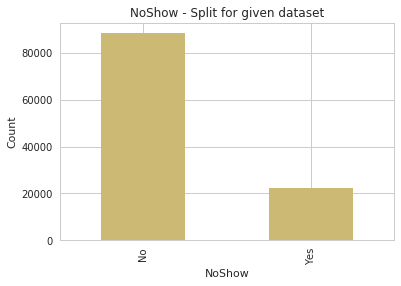

In [31]:
df['NoShow'].value_counts().plot.bar(figsize = (6,4), title = 'NoShow - Split for given dataset', color = 'y')
plt.xlabel('NoShow')
plt.ylabel('Count');

*In the above result, the patients who do not show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168 (around 80%) out of total 110,480.*

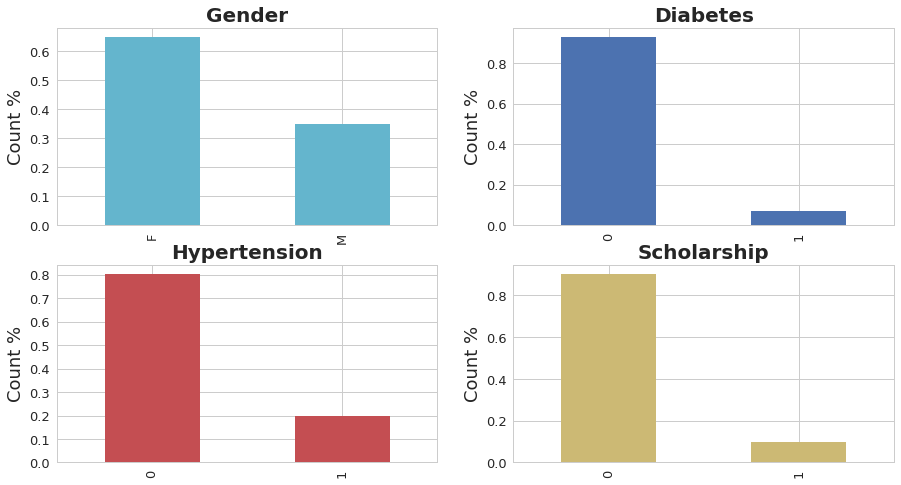

In [38]:
#Categorical and ordinal features visualisation
plt.figure(1)
plt.figure(figsize = (13,9))
iter_cols = ['Gender', 'Diabetes', 'Hypertension', 'Scholarship']
colour = ['c', 'b', 'r', 'y']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(15,8), fontsize = 13.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 20.0)
    plt.ylabel('Count %', fontsize = 18.0)
    i = i +1   

The above bar plots shows that:

1. 65% patient instances are with female records
2. 88% of patient instacnes do not have diabetes
3. 20% of patient instances have Hypertension.
4. Around 85% of the these instances are not having scholarship.



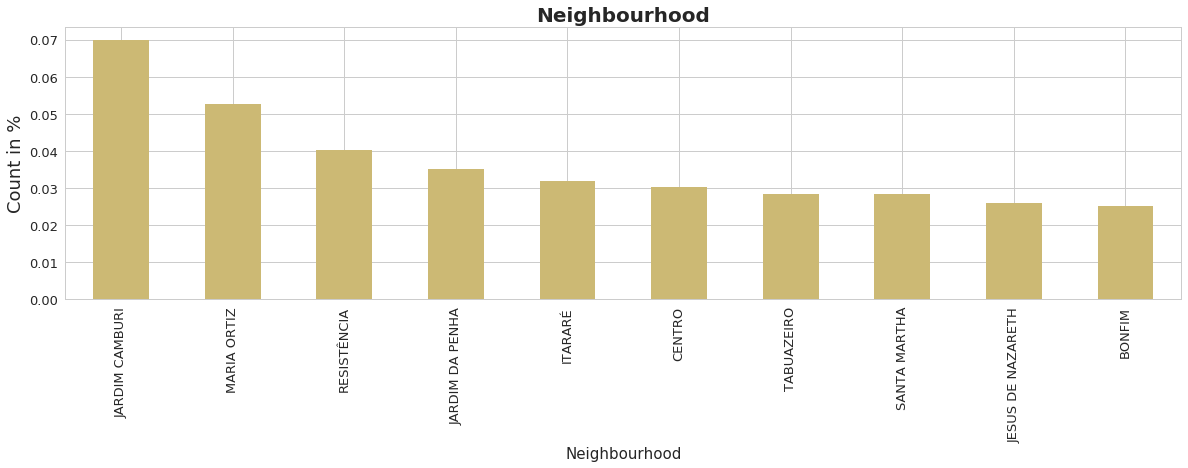

In [41]:
# We are now to plot the neighbourhood values
df['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(20,5), fontsize = 13.0, color = 'Y')
plt.title('Neighbourhood', fontweight="bold", fontsize = 20.0)
plt.ylabel('Count in %', fontsize = 18.0)
plt.xlabel('Neighbourhood', fontsize = 15.0)
plt.show()

*Above report shows that people from The Neighbourhood of **Jardim Camburi** have the highest number of appointments with physicians*

#### Numeric Attributes Visualisation

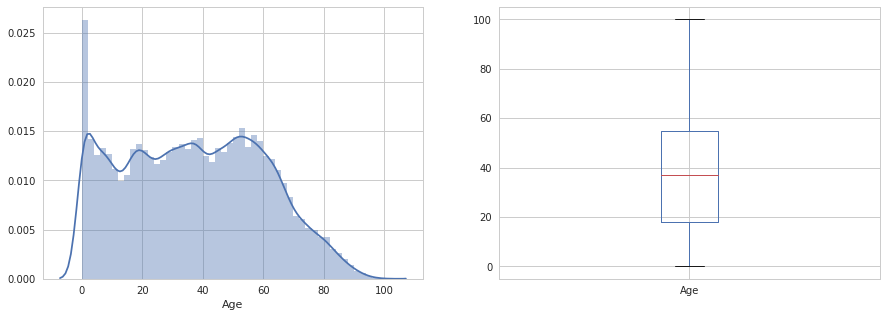

In [57]:
#Age Numeric Attributes Visualisation 

plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
df['Age'].plot.box(figsize=(15,5))

plt.show()

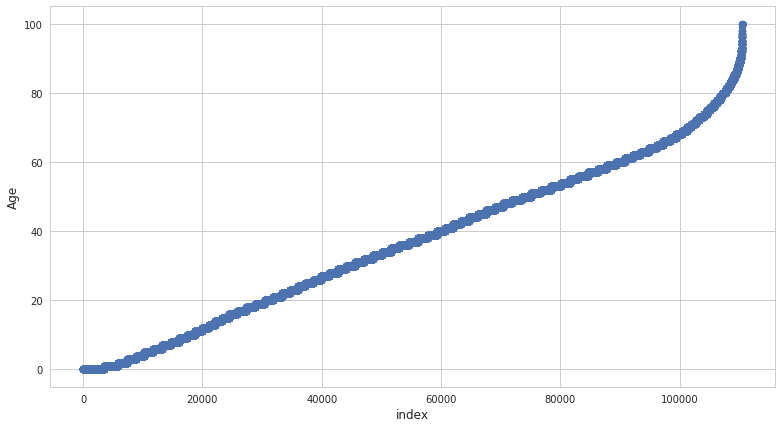

In [58]:
plt.figure(figsize=(13,7))
plt.scatter(range(df.shape[0]), np.sort(df.Age.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.show()

cnt_srs = df['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Viridius',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution'    
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

*Above graph shows that age has no outliers*

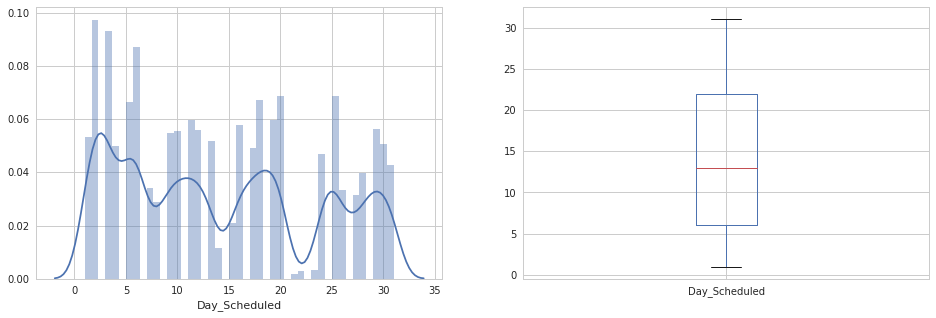

In [49]:
#Day_Scheduled Numeric Attributes Visualisation
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_Scheduled'])


plt.subplot(122)
df['Day_Scheduled'].plot.box(figsize=(16,5))

plt.show()

*Now, lets us adopt Bi-variate Analysis by using Target Variable vs Categorical Independent Variable.

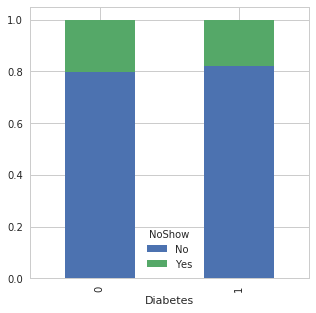

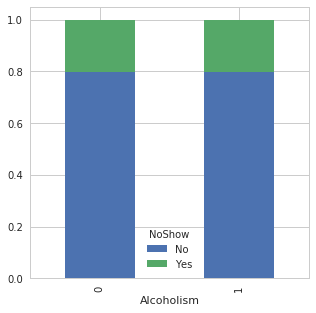

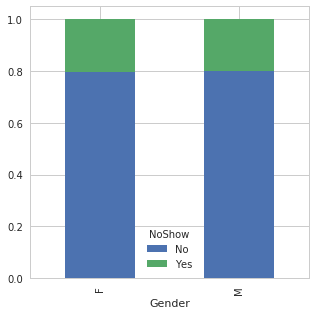

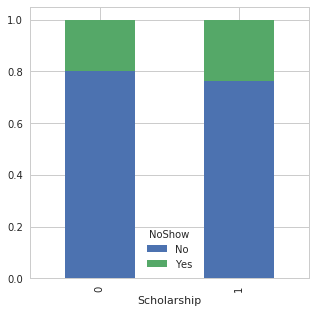

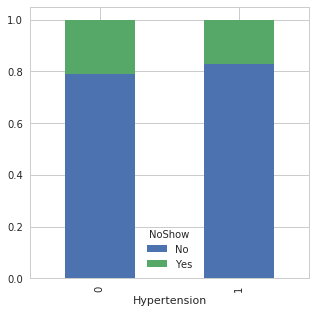

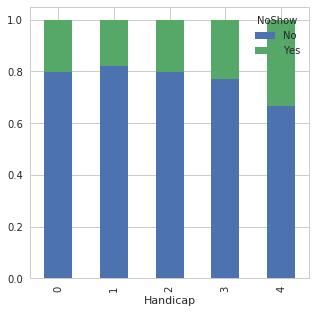

In [52]:
#Confirming relation between target variable and categorical independent variables
cat_list = [ 'Diabetes', 'Alcoholism', 'Gender', 'Scholarship', 'Hypertension', 'Handicap']
for col in cat_list:
    col1 =pd.crosstab(df[col],df['NoShow'])
    col1.div(col1.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(5,5)); 
    

The above plot results show that there  are:

- Diabetes and Hypertension have more "NoShow" status
- There is no big difference in Male and Female groups with "NoShow" status
- Instances who have scholarship have slightly more "NoShow" status
- There is no big difference in Alcoholism/Non-Alcoholism groups with "NoShow" status

In [84]:
#Checking if we have more missing values
df.isnull().sum()

Gender               0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

*Our result shows that we have no missing values*

### Creating Variables 

Now, let's identify and drop columns that are not relevant to our analysis

In [34]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

Going by what we tend to achieve in this analysis, column 'ScheduledDay', 'PatientId', 'AppointmentDay', 'AppointmentID', are not relevent, so, we have to take them out.

In [35]:
df.drop([ 'ScheduledDay', 'PatientId', 'AppointmentDay', 'AppointmentID'], axis = 1, inplace = True)

In [36]:
#confirming if the selected columns have been removed.
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [53]:
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5])

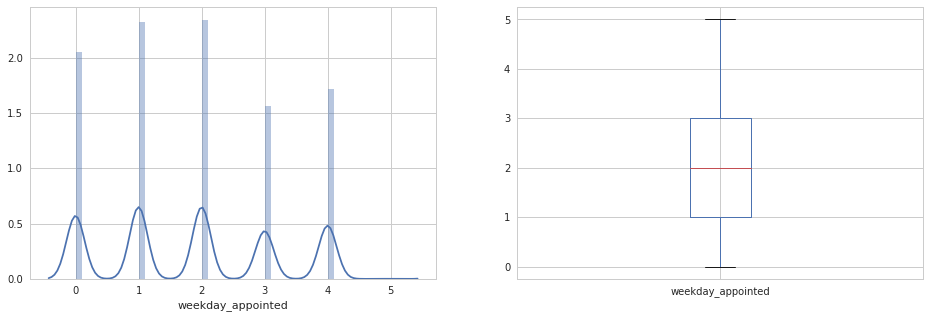

In [54]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_appointed'])


plt.subplot(122)
df['weekday_appointed'].plot.box(figsize=(16,5))

plt.show()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What  Days of the week has the highest numbers of  appointments with good Show response)

In [39]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

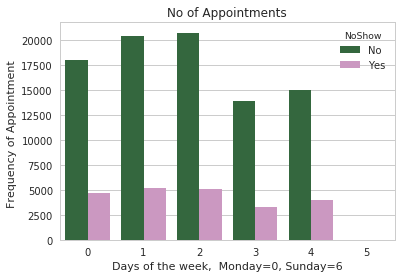

In [49]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df, palette = "cubehelix")
app_weekday.set_title('No of Appointments')
plt.xlabel('Days of the week,  Monday=0, Sunday=6')
plt.ylabel('Frequency of Appointment ')
plt.show()

***The report of the analysis above shows that appointments and visitation happens more during weekdays;
Monday to Wednesday to be specific, while there has been a low or no turnup of pateients during weekends (Saturday and Sunday)***

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Which neighbourhood has the highest number of appointments with physicians)

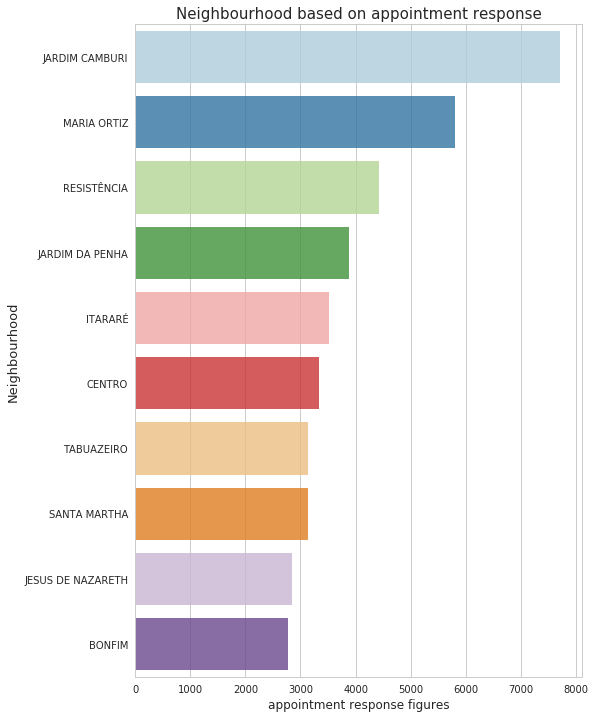

In [55]:
#We would pick top 10 Neighbourhood based on appointment response
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8, palette = "Paired")
plt.xlabel('appointment response figures', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=13)
plt.title("Neighbourhood based on appointment response", fontsize=15)
plt.show()


*Above report shows that people from The Neighbourhood of **Jardim Camburi** have the highest number of appointments with physicians*

### Research Question 3  (Does the SMS reminder positively impact the patient by ensuring they see the physicians?) 

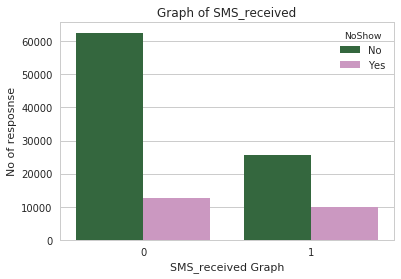

In [83]:
#We would use SMS_received to analyze this
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', palette = "cubehelix", data = df)
SMS_recieved.set_title('Graph of SMS_received')
plt.xlabel('SMS_received Graph')
plt.ylabel('No of resposnse')
plt.show()

*Above reports show that more than 60,0000 patients show up after receiving SMS reminders, which is a good indicator that patients show up for appointments when they receive a reminder*

<a id='conclusions'></a>
## Conclusions

> 1. The report of the analysis shows that appointments and visitation happen more during weekdays (Monday to Wednesday to be specific), while there has been a low or no turnup of patients during weekends (Saturday and Sunday), This is a good indication that patient prefers weekdays appointment 

>2. Majority of the patient is from Jardim Camburi Neighbourhood. This could be as a result of poor hygiene in that area or hospital proximity.

> 3. Since there is a high rate of response from patients that gets SMS reminders, it will be of great benefit and amount to a high response rate if the hospital can further increase the rate at which SMS are being sent to patient.



## Limitations 

> The limitation pointed to the SMS_Rceievd. Unfortunately, we couldn't ascertain the actual amount or SMS that each patient received that led to them showing up for an appointment. SMS sent figures is not provided in the dataset.  
> If there are  actual numbers of SMS and time sent especially to patients that show up for appointments, it should be applied to other patients and hopefully, they will also show up for an appointment 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])